In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib.gridspec import GridSpec

import sklearn.preprocessing as skp
import sklearn.cluster as skc

import warnings # ignore warnings
warnings.filterwarnings('ignore')

## Data Gathering

In [2]:
customer_demographics_df = pd.read_csv("./data/Customer_demographics_data.csv") #, encoding='latin1')
customer_demographics_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,3824657.0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,3717191.0,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,3581921.0,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,3759999.0,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,3306626.0,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
8063,NaN,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,NaN,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,NaN,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,NaN,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [3]:
customer_demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3333 non-null   float64
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 630.4+ KB


In [4]:
customer_demographics_df.isnull().sum()

ID                 4735
Gender                0
Ever_Married        140
Age                   0
Graduated            78
Profession          124
Work_Experience     829
Spending_Score        0
Family_Size         335
Var_1                76
dtype: int64

In [5]:
invoice_df = pd.read_csv(r'./data/Customer_invoice_data.csv', encoding='latin1')

In [6]:
invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿InvoiceNo  541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
print(invoice_df.isnull().sum())

ï»¿InvoiceNo         0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
dtype: int64


In [8]:
# read in the data (downloaded from Kaggle)
cb_df = pd.read_csv("./data/Customer_behaviour_data.csv", delimiter=';')

# print the first 5 rows
cb_df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [9]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [10]:
print(cb_df.isnull().sum())

account length                         0
location code                          0
user id                                0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64


## Data Cleaning

### Customer Demographics Data

#### Missing Value Treatmeant

In [11]:
customer_demographics_df.dropna(subset=["ID"], inplace=True)
customer_demographics_df["ID"]= customer_demographics_df["ID"].astype(int)

In [12]:
customer_demographics_df['Ever_Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
customer_demographics_df['Ever_Married'].fillna("Not Available",inplace=True)
customer_demographics_df['Ever_Married'].unique()

array(['No', 'Yes', 'Not Available'], dtype=object)

In [14]:
customer_demographics_df['Graduated'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
customer_demographics_df['Graduated'].fillna("Not Available",inplace=True)
customer_demographics_df['Graduated'].unique()

array(['No', 'Yes', 'Not Available'], dtype=object)

In [16]:
customer_demographics_df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [17]:
customer_demographics_df['Profession'].fillna("Not Available",inplace=True)
customer_demographics_df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'Not Available'],
      dtype=object)

In [18]:
customer_demographics_df['Work_Experience'].unique()

array([ 1., nan,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,
        6., 10., 11.])

In [19]:
customer_demographics_df['Work_Experience'].fillna(0,inplace=True)
customer_demographics_df['Work_Experience'] = customer_demographics_df['Work_Experience'].astype(int)

In [20]:
customer_demographics_df['Family_Size'].unique()

array([ 4.,  3.,  1.,  2.,  6., nan,  5.,  8.,  7.,  9.])

In [21]:
customer_demographics_df['Family_Size'].fillna(0,inplace=True)
customer_demographics_df['Family_Size'] = customer_demographics_df['Family_Size'].astype(int)

In [22]:
customer_demographics_df['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [23]:
customer_demographics_df['Var_1'].fillna("Not Available",inplace=True)
customer_demographics_df['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2',
       'Not Available', 'Cat_5'], dtype=object)

In [24]:
customer_demographics_df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [25]:
customer_demographics_df.describe()

,ID,Age,Work_Experience,Family_Size
count,3.333000e+03,3333.000000,3333.000000,3333.000000
mean,3.746291e+06,43.238524,2.370237,2.727573
std,2.746626e+05,16.599778,3.344430,1.587072
min,3.271058e+06,18.000000,0.000000,0.000000
25%,3.508680e+06,30.000000,0.000000,2.000000
50%,3.748187e+06,40.000000,1.000000,2.000000
75%,3.985970e+06,53.000000,3.000000,4.000000
max,4.229964e+06,89.000000,14.000000,9.000000


In [26]:
customer_demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 3332
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               3333 non-null   int32 
 1   Gender           3333 non-null   object
 2   Ever_Married     3333 non-null   object
 3   Age              3333 non-null   int64 
 4   Graduated        3333 non-null   object
 5   Profession       3333 non-null   object
 6   Work_Experience  3333 non-null   int32 
 7   Spending_Score   3333 non-null   object
 8   Family_Size      3333 non-null   int32 
 9   Var_1            3333 non-null   object
dtypes: int32(3), int64(1), object(6)
memory usage: 247.4+ KB


In [27]:
customer_demographics_df['Spending_Score'].unique()

array(['Low', 'Average', 'High'], dtype=object)

#### Checking for Duplicates

In [28]:
customer_demographics_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4
1,3717191,Female,Yes,38,Yes,Engineer,0,Average,3,Cat_4
2,3581921,Female,Yes,67,Yes,Engineer,1,Low,1,Cat_6
3,3759999,Male,Yes,67,Yes,Lawyer,0,High,2,Cat_6
4,3306626,Female,Yes,40,Yes,Entertainment,0,High,6,Cat_6
...,...,...,...,...,...,...,...,...,...,...
3328,4144276,Male,No,18,No,Healthcare,6,Low,7,Cat_6
3329,3703271,Female,No,27,No,Engineer,0,Low,2,Cat_6
3330,3288230,Female,Yes,62,Yes,Artist,0,Average,3,Cat_6
3331,3646381,Male,Yes,68,No,Artist,0,Low,1,Cat_6


In [29]:
customer_demographics_df[customer_demographics_df.duplicated()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1


### Customer Invoice Data

#### Missing Value Treatment

In [30]:
invoice_df.columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']

In [31]:
# dropping customerID rows with null values
invoice_df = invoice_df.dropna()

In [32]:
# checking for missing data
print(invoice_df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [33]:
#### Checking for Duplicates

In [34]:
duplicates = invoice_df[invoice_df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

             InvoiceDate  UnitPrice  CustomerID         Country  
517     12/01/201

In [35]:
# dropping the duplicated rows
invoice_df = invoice_df[~invoice_df.duplicated(keep=False)]

In [36]:
invoice_df['InvoiceNo'] = pd.to_numeric(invoice_df['InvoiceNo'], errors='coerce', downcast='integer')

In [37]:
# Handle NaN values (replace with 0 in this example)
invoice_df['InvoiceNo'] = invoice_df['InvoiceNo'].fillna(0)

# Handle floating-point values (round in this example)
invoice_df['InvoiceNo'] = invoice_df['InvoiceNo'].round().astype(int)

In [38]:
# Handle NaN values (replace with 0 in this example)
invoice_df['InvoiceNo'] = invoice_df['InvoiceNo'].fillna(0)

In [39]:
# Count the number of rows with 0 values in the 'InvoiceNo' column
num_rows_with_zero = (invoice_df['InvoiceNo'] == 0).sum()

# Display the number of rows with 0 values
print(f"Number of rows with 0 values in 'InvoiceNo': {num_rows_with_zero}")

Number of rows with 0 values in 'InvoiceNo': 8844


In [40]:
# deleting the rows with 0 invoiceno as 0
invoice_df = invoice_df[invoice_df['InvoiceNo'] != 0]

In [41]:
# Specify the column name you want to clean
column_to_clean = 'InvoiceNo'

# Convert the column to string type
invoice_df.loc[:, column_to_clean] = invoice_df[column_to_clean].astype(str)

# Remove leading and trailing spaces
invoice_df.loc[:, column_to_clean] = invoice_df[column_to_clean].str.strip()

# Replace consecutive spaces with a single space
invoice_df.loc[:, column_to_clean] = invoice_df[column_to_clean].str.replace('\s{2,}', ' ', regex=True)


In [42]:
# remove extra space at the end of a text in a column
invoice_df.loc[:, column_to_clean] = invoice_df[column_to_clean].str.rstrip()

In [43]:
invoice_df.loc[:, 'Quantity'] = pd.to_numeric(invoice_df.loc[:, 'Quantity'], errors='coerce', downcast='integer')

In [44]:
invoice_df.loc[:, 'CustomerID'] = pd.to_numeric(invoice_df.loc[:, 'CustomerID'], errors='coerce', downcast='integer')

In [45]:
invoice_df.reset_index(drop=True, inplace=True)
invoice_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,3824657.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,3824657.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
...,...,...,...,...,...,...,...,...
387918,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,4104882.0,France
387919,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,4104882.0,France
387920,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,4104882.0,France
387921,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,4104882.0,France


### Customer Behaviour data

#### Missing Value Treatmeant

In [46]:
# Rename columns to make them more 'pythonic' by replacing spaces with underscores
cb_df.columns = cb_df.columns.str.replace(' ', '_')

cb_df.columns

Index(['account_length', 'location_code', 'user_id', 'credit_card_info_save',
       'push_status', 'add_to_wishlist', 'desktop_sessions', 'app_sessions',
       'desktop_transactions', 'total_product_detail_views',
       'session_duration', 'promotion_clicks', 'avg_order_value',
       'sale_product_views', 'discount_rate_per_visited_products',
       'product_detail_view_per_app_session', 'app_transactions',
       'add_to_cart_per_session', 'customer_service_calls', 'churn'],
      dtype='object')

In [47]:
# change the data-type of the 4 columns to float
cb_df['avg_order_value'] = cb_df['avg_order_value'].replace(',','.', regex=True).astype(float)
cb_df['discount_rate_per_visited_products'] = cb_df['discount_rate_per_visited_products'].replace(',','.', regex=True).astype(float)
cb_df['add_to_cart_per_session'] = cb_df['add_to_cart_per_session'].replace(',','.', regex=True).astype(float)
cb_df['product_detail_view_per_app_session'] = cb_df['product_detail_view_per_app_session'].replace(',','.', regex=True).astype(float)

cb_df.dtypes

account_length                           int64
location_code                            int64
user_id                                  int64
credit_card_info_save                   object
push_status                             object
add_to_wishlist                          int64
desktop_sessions                         int64
app_sessions                             int64
desktop_transactions                     int64
total_product_detail_views               int64
session_duration                         int64
promotion_clicks                         int64
avg_order_value                        float64
sale_product_views                       int64
discount_rate_per_visited_products     float64
product_detail_view_per_app_session    float64
app_transactions                         int64
add_to_cart_per_session                float64
customer_service_calls                   int64
churn                                    int64
dtype: object

In [48]:
# Check missing values and sort data by descending order
cb_df.isnull().sum().sort_values(ascending=False)

account_length                         0
location_code                          0
customer_service_calls                 0
add_to_cart_per_session                0
app_transactions                       0
product_detail_view_per_app_session    0
discount_rate_per_visited_products     0
sale_product_views                     0
avg_order_value                        0
promotion_clicks                       0
session_duration                       0
total_product_detail_views             0
desktop_transactions                   0
app_sessions                           0
desktop_sessions                       0
add_to_wishlist                        0
push_status                            0
credit_card_info_save                  0
user_id                                0
churn                                  0
dtype: int64

#### Checking for duplicates

In [49]:
cb_df[cb_df.duplicated()]

,account_length,location_code,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn


### Combining Datasets on Customer_ID

In [50]:
# preprocessed_data = customer_demographics_df.merge(invoice_df, on = 'Name', how = 'left')
preprocessed_data = pd.merge(customer_demographics_df, invoice_df, left_on='ID', right_on='CustomerID', how='inner')

In [51]:
preprocessed_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,3824657.0,United Kingdom
1,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
2,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,3824657.0,United Kingdom
3,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
4,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387918,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,564434,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,48,8/25/2011 11:59,1.45,4004344.0,United Kingdom
387919,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,564434,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,8,8/25/2011 11:59,2.95,4004344.0,United Kingdom
387920,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,564434,21770,OPEN CLOSED METAL SIGN,2,8/25/2011 11:59,4.95,4004344.0,United Kingdom
387921,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,564434,22671,FRENCH LAUNDRY SIGN BLUE METAL,12,8/25/2011 11:59,1.65,4004344.0,United Kingdom


In [52]:
customer_demographics_df.nunique()

ID                 3333
Gender                2
Ever_Married          3
Age                  67
Graduated             3
Profession           10
Work_Experience      15
Spending_Score        3
Family_Size          10
Var_1                 8
dtype: int64

In [53]:
invoice_df.nunique()

InvoiceNo      18535
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      3321
Country           37
dtype: int64

In [54]:
preprocessed_data.nunique()

ID                  3321
Gender                 2
Ever_Married           3
Age                   67
Graduated              3
Profession            10
Work_Experience       15
Spending_Score         3
Family_Size           10
Var_1                  8
InvoiceNo          18535
StockCode           3665
Description         3877
Quantity             302
InvoiceDate        17286
UnitPrice            441
CustomerID          3321
Country               37
dtype: int64

In [55]:
preprocessed_data = pd.merge(preprocessed_data, cb_df, left_on='ID', right_on='user_id', how='inner')

In [56]:
preprocessed_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
0,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,...,197,87,244.7,91,11.01,10.0,3,2.7,1,0
1,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,...,197,87,244.7,91,11.01,10.0,3,2.7,1,0
2,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,...,197,87,244.7,91,11.01,10.0,3,2.7,1,0
3,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,...,197,87,244.7,91,11.01,10.0,3,2.7,1,0
4,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,...,197,87,244.7,91,11.01,10.0,3,2.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387918,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,...,266,82,241.4,77,10.86,13.7,4,3.7,0,0
387919,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,...,266,82,241.4,77,10.86,13.7,4,3.7,0,0
387920,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,...,266,82,241.4,77,10.86,13.7,4,3.7,0,0
387921,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,...,266,82,241.4,77,10.86,13.7,4,3.7,0,0


In [57]:
preprocessed_data2 = preprocessed_data.copy(deep=True)
preprocessed_data2 = preprocessed_data2.drop(['Var_1','CustomerID','location_code','user_id','push_status','avg_order_value','account_length','churn'], axis=1)

In [58]:
preprocessed_data2

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,InvoiceNo,...,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls
0,3824657,Male,No,22,No,Healthcare,1,Low,4,536365,...,17,110,197,87,91,11.01,10.0,3,2.7,1
1,3824657,Male,No,22,No,Healthcare,1,Low,4,536365,...,17,110,197,87,91,11.01,10.0,3,2.7,1
2,3824657,Male,No,22,No,Healthcare,1,Low,4,536365,...,17,110,197,87,91,11.01,10.0,3,2.7,1
3,3824657,Male,No,22,No,Healthcare,1,Low,4,536365,...,17,110,197,87,91,11.01,10.0,3,2.7,1
4,3824657,Male,No,22,No,Healthcare,1,Low,4,536365,...,17,110,197,87,91,11.01,10.0,3,2.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387918,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,564434,...,23,113,266,82,77,10.86,13.7,4,3.7,0
387919,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,564434,...,23,113,266,82,77,10.86,13.7,4,3.7,0
387920,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,564434,...,23,113,266,82,77,10.86,13.7,4,3.7,0
387921,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,564434,...,23,113,266,82,77,10.86,13.7,4,3.7,0


## EDA

In [59]:
preprocessed_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387923 entries, 0 to 387922
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ID                                   387923 non-null  int32  
 1   Gender                               387923 non-null  object 
 2   Ever_Married                         387923 non-null  object 
 3   Age                                  387923 non-null  int64  
 4   Graduated                            387923 non-null  object 
 5   Profession                           387923 non-null  object 
 6   Work_Experience                      387923 non-null  int32  
 7   Spending_Score                       387923 non-null  object 
 8   Family_Size                          387923 non-null  int32  
 9   InvoiceNo                            387923 non-null  object 
 10  StockCode                            387923 non-null  object 
 11  Description  

In [60]:
preprocessed_data2.describe()

,ID,Age,Work_Experience,Family_Size,Quantity,UnitPrice,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls
count,3.879230e+05,387923.000000,387923.000000,387923.000000,387923.000000,387923.00000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000
mean,3.735876e+06,42.131139,2.267177,2.777348,13.278617,3.13463,8.069251,179.501976,30.491698,17.041217,100.259577,200.415851,100.777943,99.999928,8.938835,10.350949,4.682143,2.795529,1.640692
std,2.721660e+05,16.208632,3.232186,1.506431,182.690206,22.37660,13.706404,54.037114,9.191154,4.325239,19.796613,50.573589,20.280654,19.602843,2.311624,2.765804,2.568056,0.746836,1.460109
min,3.271058e+06,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,3.508884e+06,29.000000,0.000000,2.000000,2.000000,1.25000,0.000000,145.000000,25.000000,14.000000,88.000000,167.000000,87.000000,87.000000,7.340000,8.600000,3.000000,2.320000,1.000000
50%,3.729976e+06,39.000000,1.000000,3.000000,6.000000,1.95000,0.000000,180.000000,31.000000,17.000000,101.000000,201.000000,102.000000,100.000000,8.950000,10.300000,4.000000,2.780000,1.000000
75%,3.977125e+06,52.000000,3.000000,4.000000,12.000000,3.75000,20.000000,214.000000,36.000000,20.000000,113.000000,231.000000,116.000000,113.000000,10.470000,12.200000,6.000000,3.290000,2.000000
max,4.229964e+06,89.000000,14.000000,9.000000,80995.000000,8142.75000,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [61]:
# preprocessed_data[['ID','CustomerID','user_id']]

In [62]:
preprocessed_data2.isnull().sum()

ID                                     0
Gender                                 0
Ever_Married                           0
Age                                    0
Graduated                              0
Profession                             0
Work_Experience                        0
Spending_Score                         0
Family_Size                            0
InvoiceNo                              0
StockCode                              0
Description                            0
Quantity                               0
InvoiceDate                            0
UnitPrice                              0
Country                                0
credit_card_info_save                  0
add_to_wishlist                        0
desktop_sessions                       0
app_sessions                           0
desktop_transactions                   0
total_product_detail_views             0
session_duration                       0
promotion_clicks                       0
sale_product_vie

In [63]:
preprocessed_data[preprocessed_data.duplicated()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn


In [64]:
preprocessed_data2.nunique()

ID                                      3321
Gender                                     2
Ever_Married                               3
Age                                       67
Graduated                                  3
Profession                                10
Work_Experience                           15
Spending_Score                             3
Family_Size                               10
InvoiceNo                              18535
StockCode                               3665
Description                             3877
Quantity                                 302
InvoiceDate                            17286
UnitPrice                                441
Country                                   37
credit_card_info_save                      2
add_to_wishlist                           46
desktop_sessions                         295
app_sessions                              60
desktop_transactions                      30
total_product_detail_views               119
session_du

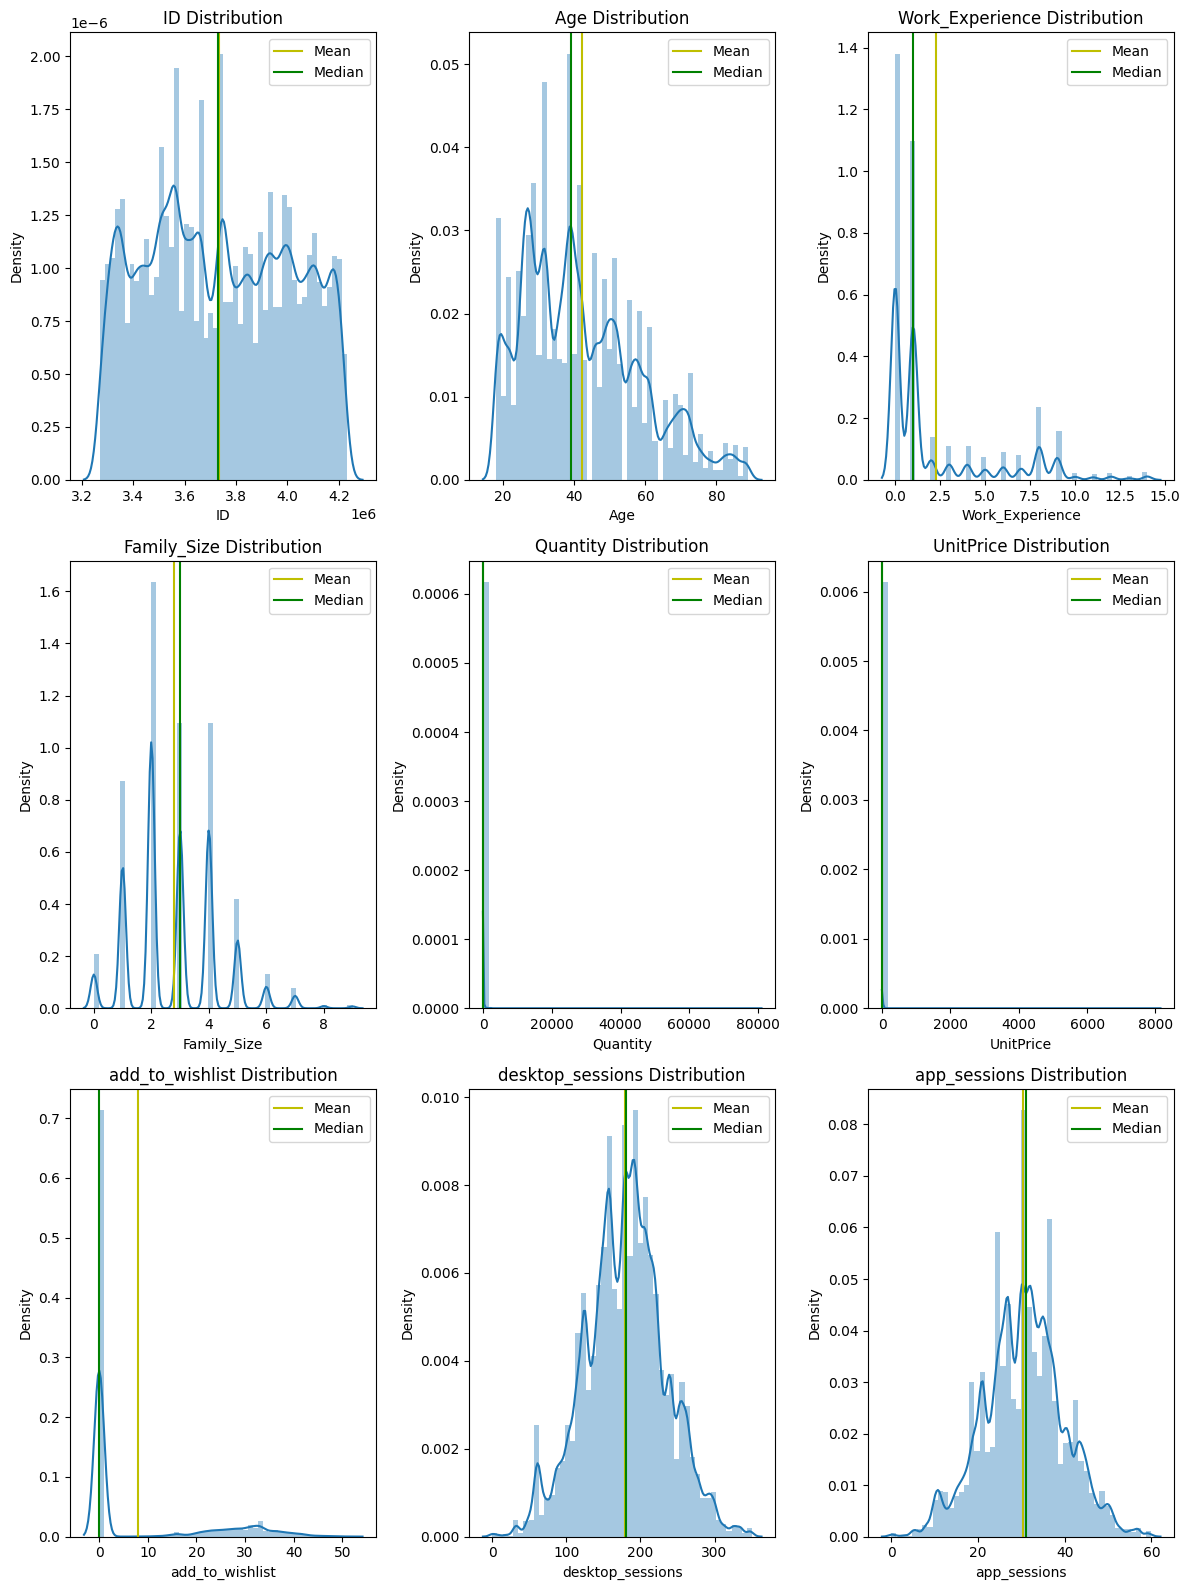

In [65]:
plt.figure(figsize=(12,16))

for i, j in enumerate(preprocessed_data2.describe().columns[:9]):
    plt.subplot(3,3, i+1)
    sns.distplot(x=preprocessed_data2[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.axvline(preprocessed_data2[j].mean(), label='Mean', color='y')
    plt.axvline(preprocessed_data2[j].median(), label='Median', color='g')
    plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.legend()
    plt.tight_layout()
# plt.savefig('hist.png')
plt.show()

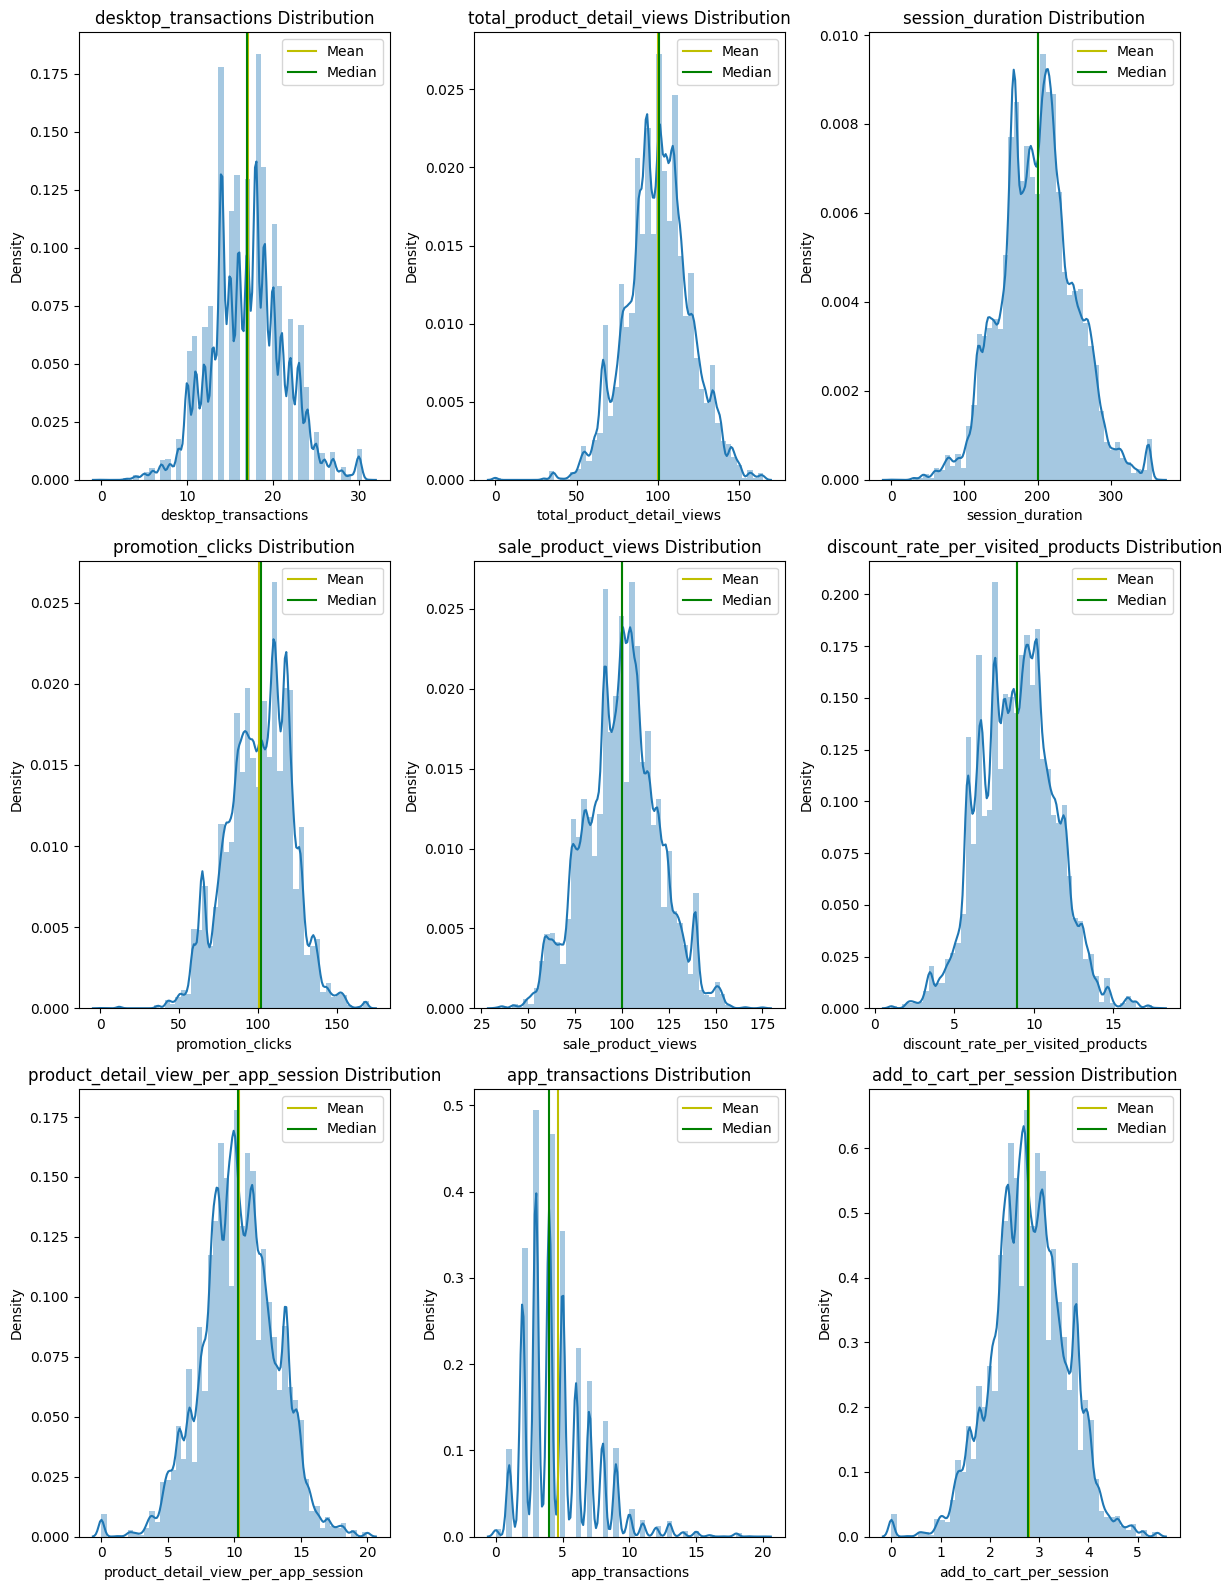

In [66]:
plt.figure(figsize=(12,16))

for i, j in enumerate(preprocessed_data2.describe().columns[9:18]):
    plt.subplot(3,3, i+1)
    sns.distplot(x=preprocessed_data2[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.axvline(preprocessed_data2[j].mean(), label='Mean', color='y')
    plt.axvline(preprocessed_data2[j].median(), label='Median', color='g')
    plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.legend()
    plt.tight_layout()
# plt.savefig('hist.png')
plt.show()

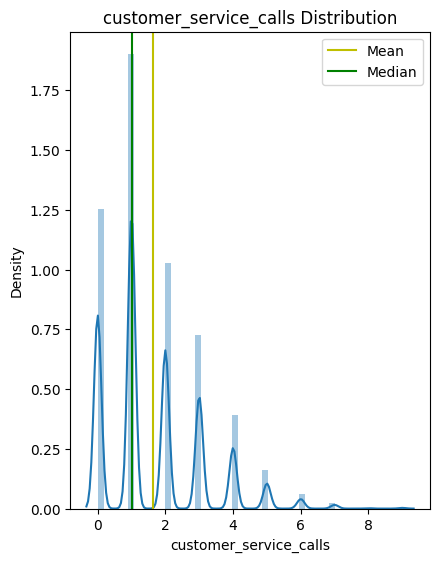

In [67]:
plt.figure(figsize=(12,16))

for i, j in enumerate(preprocessed_data2.describe().columns[18:]):
    plt.subplot(3,3, i+1)
    sns.distplot(x=preprocessed_data2[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.axvline(preprocessed_data2[j].mean(), label='Mean', color='y')
    plt.axvline(preprocessed_data2[j].median(), label='Median', color='g')
    plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.legend()
    plt.tight_layout()
# plt.savefig('hist.png')
plt.show()

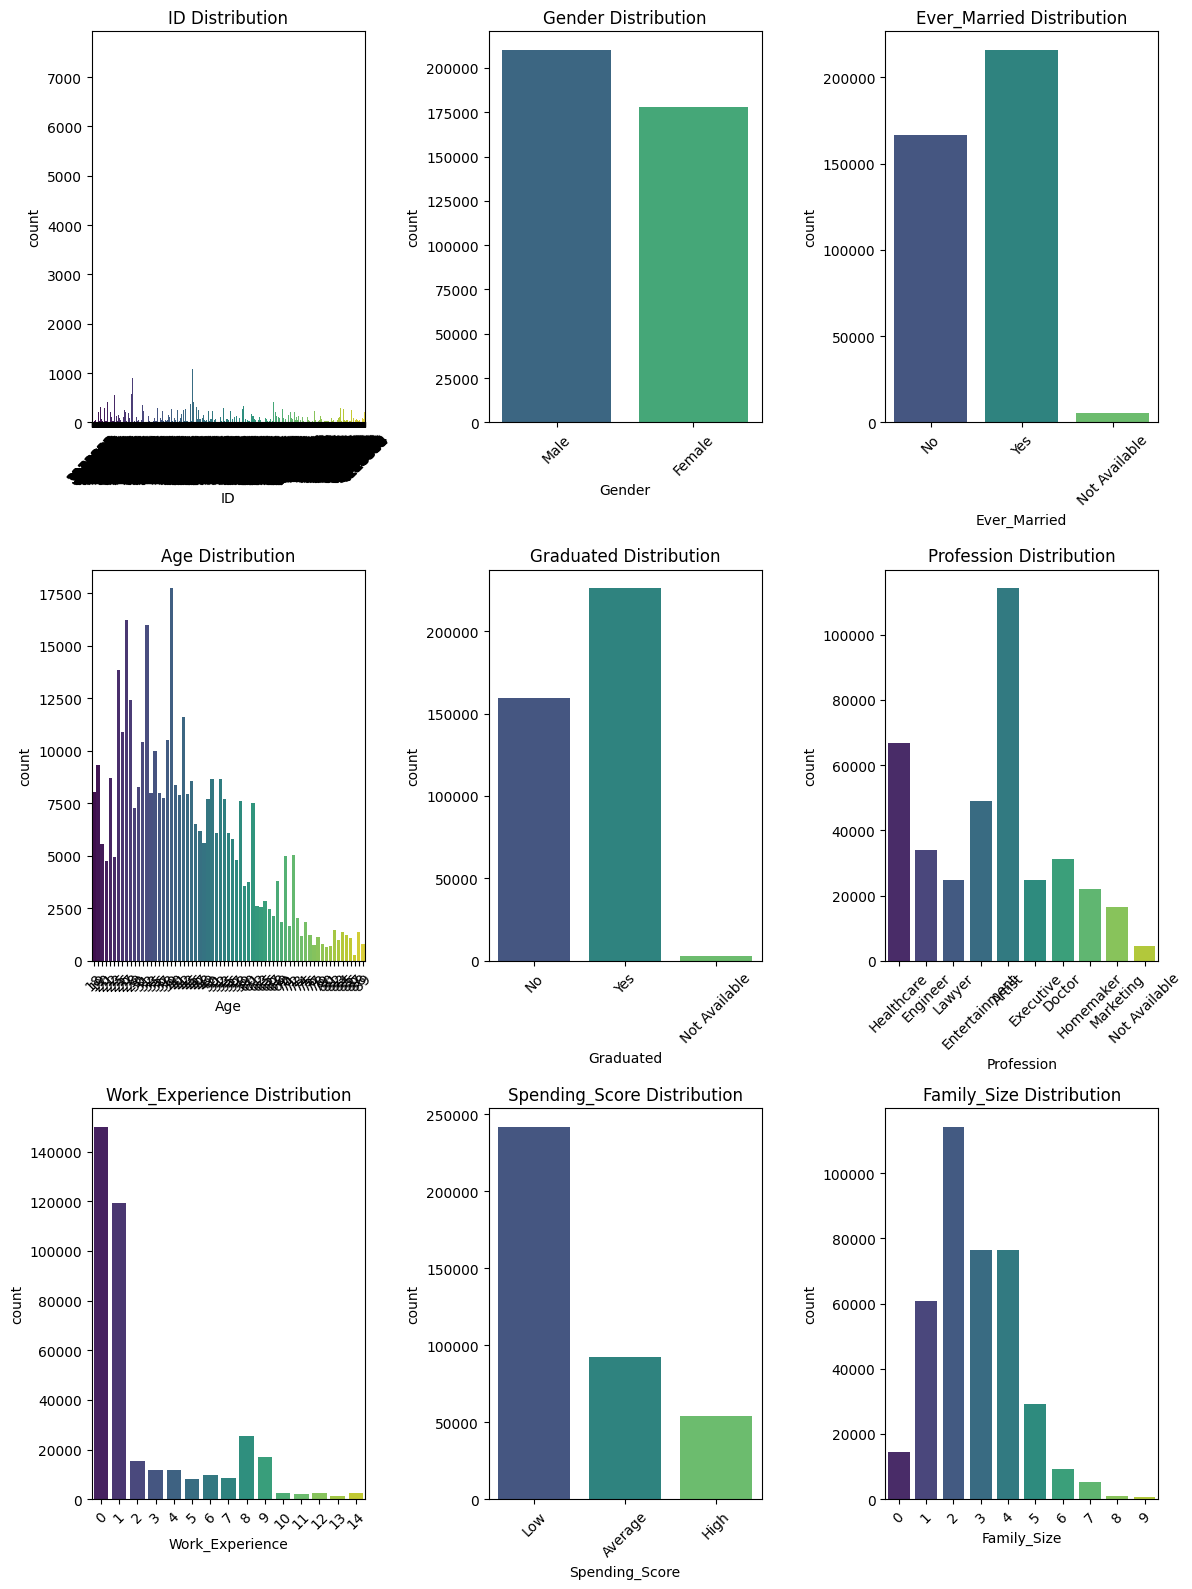

In [68]:
plt.figure(figsize=(12,16))
# customer_demographics_df2['Gender'].value_counts().plot(kind='bar', color='skyblue')
# plt.figure(figsize=(8, 6))
for i, j in enumerate(preprocessed_data2.describe(include='all').columns[:9]):

    plt.subplot(3,3, i+1)
    # sns.distplot(x=customer_demographics_df2[j])
    sns.countplot(x=j, data=preprocessed_data2, palette='viridis')
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.axvline(customer_demographics_df[j].mean(), label='Mean', color='y')
    # plt.axvline(customer_demographics_df[j].median(), label='Median', color='g')
    plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.xticks(rotation=45)
    # plt.legend()
    plt.tight_layout()

In [69]:
preprocessed_data2[['ID','Gender','Ever_Married']]

,ID,Gender,Ever_Married
0,3824657,Male,No
1,3824657,Male,No
2,3824657,Male,No
3,3824657,Male,No
4,3824657,Male,No
...,...,...,...
387918,4004344,Male,Yes
387919,4004344,Male,Yes
387920,4004344,Male,Yes
387921,4004344,Male,Yes
